<h1><font color=blue>Word or Not</font></h1>
<h3><font color=green>Umangkumar Patel</font></h3>

### Description 
<font color=blue>The aim of this project is to create a program that can decide whether a given set of letters is a word or not. We will use a dataset that contains many sets of random letters and their labels, which tell us if they are words or not. We will train and test different machine learning methods to find the one that can do this task the best. The goal is to create a program that can accurately and confidently tell us if a given set of letters is a word or not.</font>

### Data Sources 
<font color=blue>https://www.kaggle.com/datasets/yk1598/479k-english-words</font>

### Role of Artificial Intelligence 
<font color=blue>This project is related to artificial intelligence because it involves training a computer program to learn how to distinguish between words and non-words. This is done using machine learning algorithms, which allow the program to automatically learn from a large dataset of examples without being explicitly programmed for every possible scenario. The program will analyze the patterns and characteristics of the input data to identify the features that are most important for distinguishing between words and non-words, and then use this knowledge to classify new data that it has never seen before. The end goal is to create a program that can accurately and automatically classify new strings of characters as either words or non-words with a high degree of accuracy.</font>

### Topics 
<font color=blue>This project will cover the topic of Natural Language Processing (NLP) in AI, specifically in the area of text classification. It involves the use of machine learning algorithms to analyze and classify text data, which is a fundamental application of AI in NLP. The project will also cover the use of supervised learning algorithms, which are a type of machine learning technique that involves learning from labeled data to make predictions on new, unseen data. We have covered the supervised learning as part of this course, and some algorithms as far as I understand that gives an idea of how the classification works, like the Naïve Bayes (currently). </font>

### Libraries

In [30]:
import pandas as pd #library for data manipulate and analysis in Python.
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer # convert text to numbers vector for input in M.L.
from sklearn.model_selection import train_test_split # split dataset for train & testing
from sklearn.linear_model import LogisticRegression # for classification of word or not word
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay # for performance testing
import seaborn as sns # visualization
import pickle # save machine learning model

## <font color=purple>Data Preprocessing</font>

In [31]:
# Load the dataset
with open('input/english_words.txt', 'r') as f:
    words = f.read().splitlines()
df = pd.DataFrame(words, columns=['word'])

In [32]:
df.head()

,word
0,2
1,1080
2,&c
3,10-point
4,10th


In [33]:
df['word'] = df['word'].apply(lambda x: ''.join(e for e in x if e.isalpha()).lower())

In [34]:
# x='$$'
# for e in x:
#     if e.isalpha():
#         print(e.isalpha())
#         print(e)

In [35]:
df.head()

,word
0,
1,
2,c
3,point
4,th


In [36]:
df.count()

word    466544
dtype: int64

In [37]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
df.head()

,word
0,sprezzatura
1,overliterariness
2,nobiliary
3,androdioecism
4,barbarize


In [39]:
vectorizer = CountVectorizer(analyzer='char')
X = vectorizer.fit_transform(df['word'])

In [40]:
# a='abcd'
# for i in vectorizer.transform([a]):
#     print(i)

In [41]:
# Create target variable
y = []
for word in df['word']:
    if len(set(word)) == 1:
        y.append(0)
    else:
        y.append(1)

## <font color=purple>Data Visualization</font>

In [42]:
arr = X.toarray()
df_arr = pd.DataFrame(arr, columns=vectorizer.get_feature_names_out())
df_arr = df_arr.iloc[:10]

<Axes: >

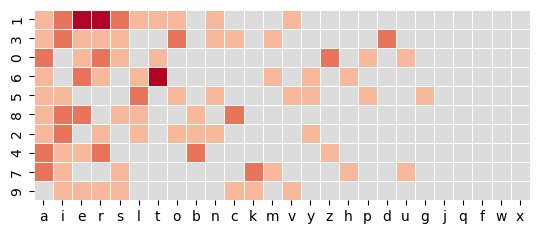

In [43]:
df_arr = df_arr[df_arr.sum().sort_values(ascending=False).index]
df_arr = df_arr.loc[df_arr.sum(axis=1).sort_values(ascending=False).index]
sns.heatmap(df_arr, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar=False)

<Axes: >

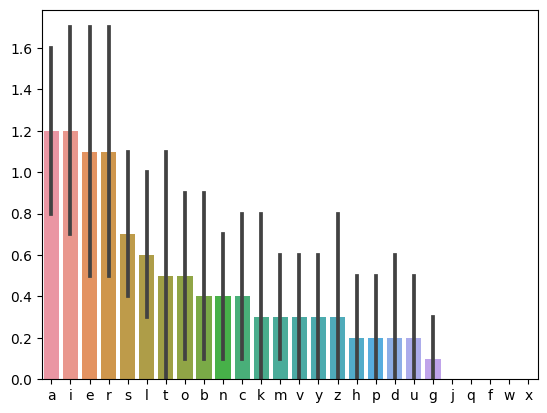

In [44]:
sns.barplot(df_arr)

## <font color=purple>Train Test Split</font>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color=purple>Build Model</font>

In [46]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## <font color=purple>Evaluation</font>

In [47]:
y_pred =model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy,'\n\n')
print(report)

Accuracy: 0.999657053446077 


              precision    recall  f1-score   support

           0       1.00      0.09      0.16        35
           1       1.00      1.00      1.00     93274

    accuracy                           1.00     93309
   macro avg       1.00      0.54      0.58     93309
weighted avg       1.00      1.00      1.00     93309



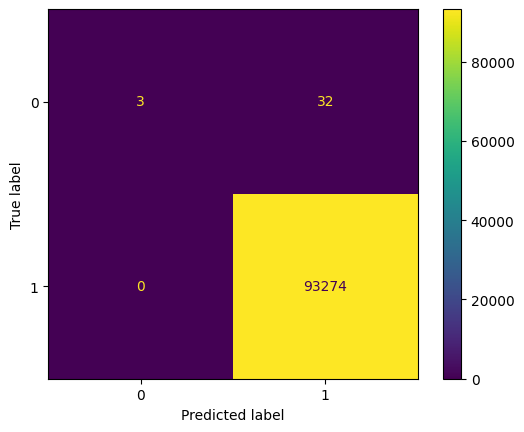

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [50]:
word_to_check = ["Hello..",'12','@..','umang']
test = vectorizer.transform(np.array(word_to_check))
prediction = model.predict(test)

for i in range(len(prediction)):
    if prediction[i] == 1:
        print(word_to_check[i], "is an English word.")
    else:
        print(word_to_check[i], "is not an English word.")

Hello.. is an English word.
12 is not an English word.
@.. is not an English word.
umang is an English word.


## <font color=purple>Save Model</font>

In [56]:
with open('output/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [57]:
with open('output/model.pkl', 'wb') as f:
    pickle.dump(model, f)